In [2]:
import pandas as pd
import numpy as np
from numpy import meshgrid

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from pandas.plotting import scatter_matrix

In [3]:
df = pd.read_csv("PredictiveModelingAssessmentData.csv")
df.head()

,y,x1,x2
0,1.300215,-0.054425,0.738897
1,-0.805025,0.130174,0.977855
2,2.801926,1.749007,1.352562
3,3.123490,-0.979458,1.664484
4,3.445728,0.300521,2.988848


In [4]:
df_train = df.copy().sample(frac=.75, random_state=404)
df_test = df.copy().drop(df_train.index)
print("length of the training set is ", len(df_train))
print("length of the testing set is ", len(df_test))

length of the training set is  3750
length of the testing set is  1250


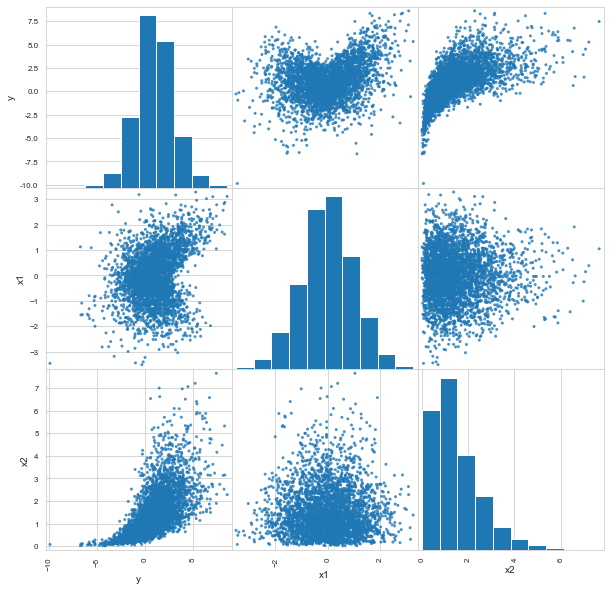

In [8]:
scatter_matrix(df_train, figsize=(10,10), alpha = 0.8)
plt.show()

In [9]:
df_train['x1_sq'] = df_train['x1']**2
df_train['x1_cb'] = df_train['x1']**3
df_train['x1_frth'] = df_train['x1']**4
df_train['logx2'] = np.log(df_train['x2'])
df_train['x1_logx2'] = df_train['x1']*df_train['logx2']
df_train['x1sq_logx2'] = df_train['x1_sq']*df_train['logx2']

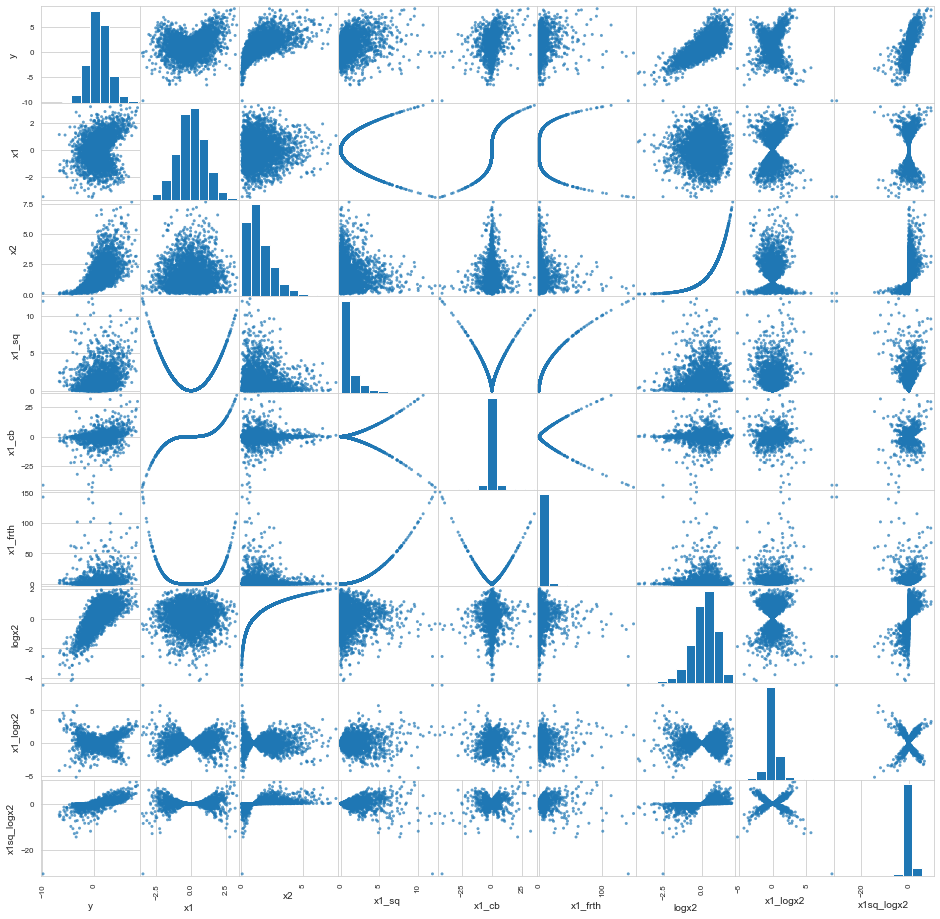

In [10]:
scatter_matrix(df_train, figsize=(16,16), alpha = 0.7)
plt.show()

In [28]:
def get_X_y(df, features, target):
    return np.array(df[features]), np.array(df[target])

def get_mse(model, X, y):
    pred = model.predict(X)
    return np.sum(np.power(pred-y, 2))/len(y)

def powerset_no_empty(s):
    power_set = []
    x = len(s)
    for i in range(1<<x):
        power_set.append([s[j] for j in range(x) if (i & (1<<j))])
    return power_set[1:]

In [29]:
s = [1,2,3,4,5]
print(powerset_no_empty(s))

[[1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3], [4], [1, 4], [2, 4], [1, 2, 4], [3, 4], [1, 3, 4], [2, 3, 4], [1, 2, 3, 4], [5], [1, 5], [2, 5], [1, 2, 5], [3, 5], [1, 3, 5], [2, 3, 5], [1, 2, 3, 5], [4, 5], [1, 4, 5], [2, 4, 5], [1, 2, 4, 5], [3, 4, 5], [1, 3, 4, 5], [2, 3, 4, 5], [1, 2, 3, 4, 5]]


In [36]:
possible_features = powerset_no_empty(["x1", "x2", "x1_sq", "x1_cb", "x1_frth", "logx2", "x1_logx2", "x1sq_logx2"])

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.base import clone

In [38]:
kfold = KFold(n_splits = 10, shuffle=True, random_state=404)

In [39]:
MSEs = np.empty((10, len(possible_features)))

In [40]:
reg = LinearRegression(copy_X=True)

In [41]:
for j in range(len(possible_features)):
    X, y = get_X_y(df_train, possible_features[j], 'y')
    i = 0
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clone_reg = clone(reg)
        clone_reg.fit(X_train, y_train)
        MSEs[i,j] = get_mse(clone_reg, X_test, y_test)
        i += 1

In [42]:
print("The model with the lowest mean CV RMSE",
     "was the one with", possible_features[np.argmin(np.mean(MSEs, axis = 0))],
     "as the features. This model had a mean CV RMSE of",
     np.round(np.min(np.mean(np.sqrt(MSEs), axis=0)),5))

The model with the lowest mean CV RMSE was the one with ['x1', 'x1_sq', 'x1_cb', 'x1_frth', 'logx2', 'x1sq_logx2'] as the features. This model had a mean CV RMSE of 1.03509


In [44]:
reg.fit(df_train[['x1','x1_sq','x1_cb','x1_frth','logx2','x1_logx2','x1sq_logx2']],df_train['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
df_test['x1_sq'] = df_test['x1']**2
df_test['x1_cb'] = df_test['x1']**3
df_test['x1_frth'] = df_test['x1']**4
df_test['logx2'] = np.log(df_test['x2'])
df_test['x1_logx2'] = df_test['x1']*df_test['logx2']
df_test['x1sq_logx2'] = df_test['x1_sq']*df_test['logx2']

In [46]:
pred = reg.predict(df_test[['x1','x1_sq','x1_cb','x1_frth','logx2','x1_logx2','x1sq_logx2']])

In [49]:
test_rmse = np.sqrt(get_mse(reg,
                np.array(df_test[['x1','x1_sq','x1_cb','x1_frth','logx2','x1_logx2','x1sq_logx2']]),
                np.array(df_test['y'])))

In [50]:
print("The test root mean square error for our model is", np.round(test_rmse,3))

The test root mean square error for our model is 1.018
